<div style="border-bottom: 3px solid black; margin-bottom:3px"></div>
<div style="border-bottom: 3px solid black"></div>

# Introduction

<div style="border-bottom: 3px dotted black; margin-bottom:3px"></div>
<div style="border-bottom: 3px solid black"></div>

The goal of this project is to, given many unique features of a property, estimate its sales price. Additionally, the goal is to compare the results of many different regression models to get a better understanding of which model performs the best and why. 

Our approach will have two significant steps: 

### 1. Polishing the data

We must start by **analyzing** train.csv and test.csv and **asking the right questions**. *Which features look most important? What kind of correlations do they have with the sales price? Which features are categorical vs numerical?* Afterwards, we need to **filter out redundant data** such as outliers, features with a lot of missing data, and so on. Finally, we need to **normalize the data** and **convert categorical features** to a number (if they are ordered) or to a dummy variable (if they are not ordered).

### 2. Training our models

Once the data is polished, we can begin **training a variety of different models**: X, Y, Z, and more. We will try **different parameters** per model as well. In the end, we will **compare the predictions** to see which model with which parameters returns the best results, and hopefully have **a good explanation or hypothesis** to why that is. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# model libraries will be imported when we start the actual training

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 1. Polishing the data

A refined dataset is just as important, if not more important, then the model training itself. Let's start with reading the csv files and assigning them variables that we will throughout the entirety of the project.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
train.head(10)

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


<div style="border-bottom: 3px solid black"></div>

## 1.1 Analyzing the data

It's time to get a better look at what we are working with.


In [3]:
# analyze the list of features and hypothesize which ones look important
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<div style="border-bottom: 3px solid black"></div>

Our limited knowledge of real estate would tell us that the following features are most significant
to a property's value: 

     1. Neighborhood
     2. OverallQual
     3. YearBuilt
     4. TotalBsmtSF
     5. GrLivArea
 
 So, we will dive deeper into these features. 

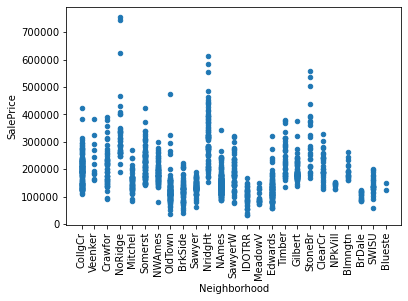

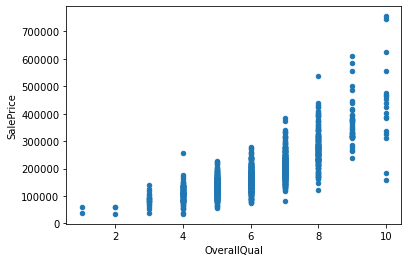

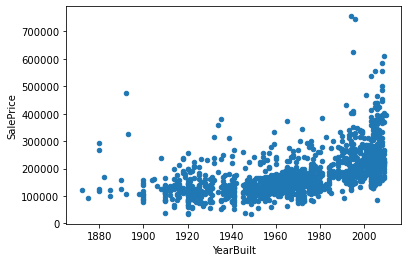

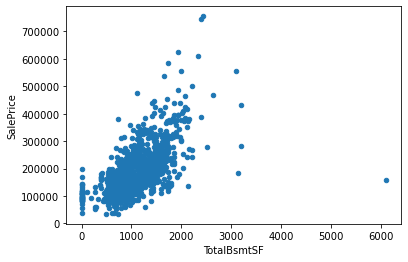

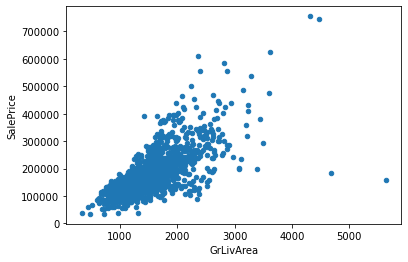

In [4]:
def scatter_plot(X, Y, rotation=None):
    """ Scatter plot against given X,Y variables """
    data = pd.concat([train[Y], train[X]], axis=1)
    data.plot.scatter(X, Y)
    plt.xticks(rotation=rotation)
    
# plot the 5 features we are most interested in
scatter_plot('Neighborhood', 'SalePrice', rotation=90)
scatter_plot('OverallQual', 'SalePrice')
scatter_plot('YearBuilt', 'SalePrice')
scatter_plot('TotalBsmtSF', 'SalePrice')
scatter_plot('GrLivArea', 'SalePrice')

<div style="border-bottom: 3px solid black"></div>

### Observation

We can see that, for the most part, our hypothesis was correct that these features have some evident correlation with the sale price. Overall Quality has some sporadic data at the value *10*, but otherwise the correlation is clearly present. Year Built appears to have no correlation with the sale price until the *1980s* and then *2000s*, so we will likely split those up when we transform the data later. Finally, TotalBsmtSF and GrLivArea both contain some outliers that should be removed later.

Let us view the top and bottom 10 correlations so that we can potentially identify more important features that we did not initially consider, while also identifying features that we may straight up remove for being irrelevant. 

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:>

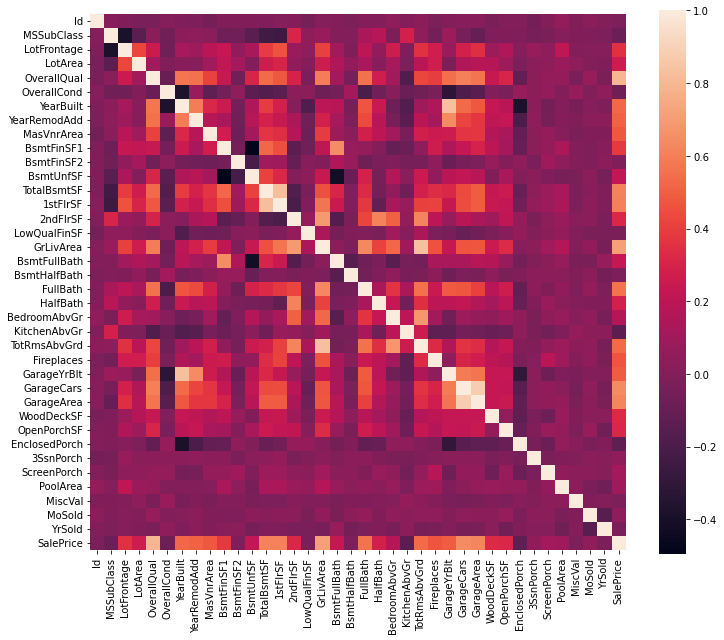

In [6]:
# sorted list of highest correlations with Sale Price
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

# heat map for a pretty display of the data
corr = train.corr()
plt.subplots(figsize=(12, 10))
sns.heatmap(corr, square=True)

<div style="border-bottom: 3px solid black"></div>

### Observation

It looks like we were spot on with our assumptions that *Overall Quality*, *TotalBsmtSF* and *GrLivArea* were important features, as they are all top 5. *GarageCars* and *GarageArea* make appearances, which makes sense as they also contribute to the size of the house. 

Unfortunately, panda's correlation function only considers numerical features. Thus, categorical features such as Neighborhood are excluded from the matrix which means we may be missing out on important and/or noisy data. We will come back to this when we transform the data in a few moments.

<div style="border-bottom: 3px solid black; margin-top:20px"></div>

## 1.2 Filtering the data

Now that we have spent a good amount of time observing and analyzing the key parts of our data, we can start filtering the noise. Let's start by removing the fields that clearly have no correlation with the Sale Price. Then, we will remove any irrelevant columns (i.e. features that are either too dense or have too much missing data). Finally, we will eliminate the outliers we discovered in 1.1. 

In [13]:
def remove_cols(cols):
    """Removes given features from the training and test datasets"""
    global train, test

    for col in cols:
        train.drop([col], axis=1, inplace=True)
        test.drop([col], axis=1, inplace=True)
        
# save IDs before dropping them, as we will probably need them later for our predictions submission
train_id = train['Id']
test_id = test['Id']

# remove bottom 10 fields discovered in 1.1 correlation list
no_corr = np.array(['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF',
                    'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'])
remove_cols(no_corr)

<div style="border-bottom: 3px solid black"></div>

### 1.2.1 Missing Data

In [7]:
missing_traindata = train.isnull().sum() / len(train)
missing_traindata = pd.DataFrame({'Missing %': missing_traindata.sort_values(ascending=False)})
missing_traindata.head(20)

,Missing %
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479


In [12]:
missing_testdata = test.isnull().sum() / len(train)
missing_testdata = pd.DataFrame({'Missing %': missing_testdata.sort_values(ascending=False)})
missing_testdata.head(20)

,Missing %
PoolQC,0.997260
MiscFeature,0.964384
Alley,0.926027
Fence,0.800685
FireplaceQu,0.500000
LotFrontage,0.155479
GarageYrBlt,0.053425
GarageQual,0.053425
GarageFinish,0.053425
GarageCond,0.053425


<div style="border-bottom: 3px solid black"></div>

### Observation

PoolQC, MiscFeature, Alley and Fence each have over 80% of their data missing, and FireplaceQu has nearly half of its data missing. So, we are going to exclude these features from our models. The rest have only partially missing data and thus will be filled with a value that makes sense. 

In [14]:
# remove aforementioned features
missing_data = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
remove_cols(missing_data)

# !-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-! #
#   Credit to Kaggle user @serigne for the following ideas to populate missing data   #
# !-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-! #

# fill lot frontage with its neighbourhood's average
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# fill Garage and Basement categorical features with No
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType'):
    train[col] = train[col].fillna('No')
    test[col] = test[col].fillna('No')
    
# the following are likely missing data because they have a value of 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 
            'BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
            'MasVnrArea'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)
    
# the following are barely missing any data, so they'll be filled with their most common value
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train["Functional"] = train["Functional"].fillna("Typ")

# repeat for test
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test["Functional"] = test["Functional"].fillna("Typ")

missing_traindata = train.isnull().sum() / len(train)
missing_traindata = pd.DataFrame({'Missing %': missing_traindata.sort_values(ascending=False)})
missing_traindata.head(20)

,Missing %
MSZoning,0.0
GarageType,0.0
HeatingQC,0.0
CentralAir,0.0
Electrical,0.0
1stFlrSF,0.0
2ndFlrSF,0.0
GrLivArea,0.0
BsmtFullBath,0.0
FullBath,0.0


In [15]:
missing_testdata = test.isnull().sum() / len(train)
missing_testdata = pd.DataFrame({'Missing %': missing_testdata.sort_values(ascending=False)})
missing_testdata.head(20)

,Missing %
MSZoning,0.0
TotalBsmtSF,0.0
HeatingQC,0.0
CentralAir,0.0
Electrical,0.0
1stFlrSF,0.0
2ndFlrSF,0.0
GrLivArea,0.0
BsmtFullBath,0.0
FullBath,0.0


<div style="border-bottom: 3px solid black"></div>

### 1.2.2 Dense Data

In [16]:
density = {}
for col in train:
    density[col] = train[col].value_counts().max() / len(train)

density_sorted = sorted(density, key=density.get, reverse=True)
for col in density_sorted:
    print(f'{col}: {density[col]}')


Utilities: 0.9993150684931507
Street: 0.9958904109589041
PoolArea: 0.9952054794520548
Condition2: 0.9897260273972602
3SsnPorch: 0.9835616438356164
RoofMatl: 0.9821917808219178
Heating: 0.9780821917808219
LandSlope: 0.9465753424657535
CentralAir: 0.934931506849315
Functional: 0.9315068493150684
ScreenPorch: 0.9205479452054794
PavedDrive: 0.9178082191780822
Electrical: 0.9143835616438356
GarageCond: 0.9082191780821918
LandContour: 0.897945205479452
BsmtCond: 0.897945205479452
GarageQual: 0.897945205479452
ExterCond: 0.8780821917808219
SaleType: 0.8678082191780822
Condition1: 0.863013698630137
BsmtFinType2: 0.8602739726027397
BldgType: 0.8356164383561644
SaleCondition: 0.8205479452054795
MSZoning: 0.7883561643835616
RoofStyle: 0.7815068493150685
LotConfig: 0.7205479452054795
BsmtExposure: 0.6787671232876712
LotShape: 0.6335616438356164
HalfBath: 0.6253424657534247
ExterQual: 0.6205479452054794
GarageType: 0.5958904109589042
MasVnrArea: 0.5952054794520548
MasVnrType: 0.5917808219178082
Bsm

<div style="border-bottom: 3px solid black"></div>

### Observation

That's a lot of useless data for a predictive model! Let's get rid of the features with data density > 95%.  

In [17]:
dense_data = ['Utilities', 'Street', 'PoolArea', 'Condition2', '3SsnPorch', 'RoofMatl', 'Heating']
remove_cols(dense_data)

<div style="border-bottom: 3px solid black"></div>

### Outliers

Last but not least, we can get rid of the outliers we discussed in 1.1.

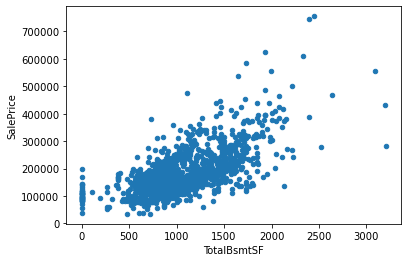

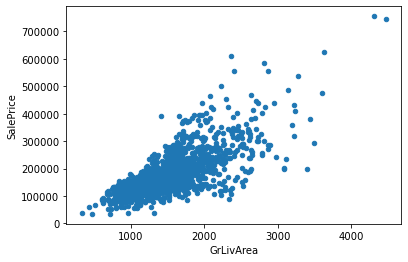

In [18]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)
train = train.drop(train[(train['TotalBsmtSF'] > 4000)].index)
scatter_plot('TotalBsmtSF', 'SalePrice')
scatter_plot('GrLivArea', 'SalePrice')

<div style="border-bottom: 3px solid black"></div>

## 1.3 Transforming the data

Now that we have filtered out data we don't need, we can begin transforming out data. This includes converting categorical features to a numerical value (if they have an order), transforming categorical features via one-hot encoding (if they do not have an order), and normalizing the dataset. 

<div style="border-bottom: 3px solid black; margin-top: 20px"></div>

### 1.3.1 Categorical features that have an order

In [19]:
# !-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-! #
#           Credit to Kaggle user @juliencs for the following inspiration             #
#                    for converting ordered categorical features                      #
# !-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-!-! #

train = train.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"No" : 0, "Unf" : 1, "RFn": 2, "Fin" : 3},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "Neighborhood" : {"CollgCr" : 3, "Veenker" : 3, "Crawfor" : 3, "NoRidge" : 4,
                                          "Mitchel" : 2, "Somerst" : 3, "NWAmes" : 3, "OldTown" : 1,
                                          "BrkSide" : 1, "Sawyer" : 1, "NridgHt" : 4, "NAmes" : 2,
                                          "SawyerW" : 3, "IDOTRR" : 1, "MeadowV" : 1, "Edwards" : 2,
                                          "Timber" : 3, "Gilbert" : 3, "StoneBr" : 4, "ClearCr" : 3,
                                          "NPkVill" : 2, "Blmngtn" : 3, "BrDale" : 1, "SWISU" : 1, "Blueste" : 2},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}}
                     )

test = test.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"No" : 0, "Unf" : 1, "RFn": 2, "Fin" : 3},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "Neighborhood" : {"CollgCr" : 3, "Veenker" : 3, "Crawfor" : 3, "NoRidge" : 4,
                                          "Mitchel" : 2, "Somerst" : 3, "NWAmes" : 3, "OldTown" : 1,
                                          "BrkSide" : 1, "Sawyer" : 1, "NridgHt" : 4, "NAmes" : 2,
                                          "SawyerW" : 3, "IDOTRR" : 1, "MeadowV" : 1, "Edwards" : 2,
                                          "Timber" : 3, "Gilbert" : 3, "StoneBr" : 4, "ClearCr" : 3,
                                          "NPkVill" : 2, "Blmngtn" : 3, "BrDale" : 1, "SWISU" : 1, "Blueste" : 2},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}}
                     )

<div style="border-bottom: 3px solid black"></div>

### 1.3.2 One-hot encoding of unordered categorical features

In [20]:
traindm = pd.get_dummies(train)
testdm = pd.get_dummies(test)
print(train.shape)
print(test.shape)

(1458, 59)
(1459, 58)


<div style="border-bottom: 3px solid black"></div>

### 1.3.3 Reviewing Correlation

When we calculated correlation earlier, we did not consider categorical feature. Now that they have been converted, let's take another look at those correlations.

In [21]:
corr = traindm.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice.tail(50)

SaleType_ConLD          -0.041804
Exterior2nd_Stucco      -0.041871
MasVnrType_BrkCmn       -0.044410
SaleCondition_Family    -0.046499
Condition1_RRAe         -0.046666
Exterior2nd_Brk Cmn     -0.047388
Electrical_FuseP        -0.047769
SaleCondition_AdjLand   -0.050695
LandSlope               -0.051122
Exterior1st_BrkComm     -0.051271
Exterior1st_WdShing     -0.051339
Exterior2nd_Plywood     -0.052995
HouseStyle_1Story       -0.062002
MSZoning_RH             -0.065447
Exterior2nd_HdBoard     -0.067933
GarageType_CarPort      -0.070384
LotConfig_Inside        -0.080933
SaleType_COD            -0.081076
HouseStyle_1.5Unf       -0.087704
HouseStyle_SFoyer       -0.093118
Exterior1st_HdBoard     -0.095224
BldgType_2fmCon         -0.097374
BldgType_Twnhs          -0.098760
Exterior2nd_AsbShng     -0.099241
LandContour_Bnk         -0.101995
Condition1_Artery       -0.106433
Exterior1st_AsbShng     -0.109147
MSZoning_C (all)        -0.111272
BldgType_Duplex         -0.114689
Condition1_Fee

<div style="border-bottom: 3px solid black"></div>

### Observation

The neighborhoods all have very poor correlations, which doesn't make much sense because we concluded earlier that most neighborhoods had a decent representation of wealth class. After some deliberation, we realize the low correlations are because many neighbourhoods have the same average property price as other neighborhoods, therefore it's hard to distinguish between eachother. We can fix this by assigning a "wealth" value to each neighborhood, based off the figure we saw in 1.1.
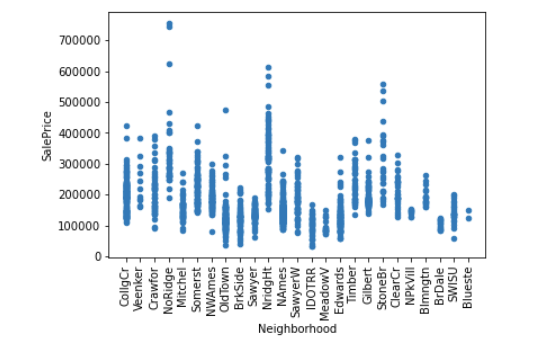

In [22]:
# remove LotShape since the transformed data tells us it's irrelevant
remove_cols(['LotShape'])

# Assign neighborhoods a rough wealth class
# 1 = poor
# 2 = below mid class
# 3 = above mid class
# 4 = wealthy

train = train.replace({"Neighborhood" : {"CollgCr" : 3, "Veenker" : 3, "Crawfor" : 3, "NoRidge" : 4,
                                          "Mitchel" : 2, "Somerst" : 3, "NWAmes" : 3, "OldTown" : 1,
                                          "BrkSide" : 1, "Sawyer" : 1, "NridgHt" : 4, "NAmes" : 2,
                                          "SawyerW" : 3, "IDOTRR" : 1, "MeadowV" : 1, "Edwards" : 2,
                                          "Timber" : 3, "Gilbert" : 3, "StoneBr" : 4, "ClearCr" : 3,
                                          "NPkVill" : 2, "Blmngtn" : 3, "BrDale" : 1, "SWISU" : 1, "Blueste" : 2}}
                     )

test = test.replace({"Neighborhood" : {"CollgCr" : 3, "Veenker" : 3, "Crawfor" : 3, "NoRidge" : 4,
                                          "Mitchel" : 2, "Somerst" : 3, "NWAmes" : 3, "OldTown" : 1,
                                          "BrkSide" : 1, "Sawyer" : 1, "NridgHt" : 4, "NAmes" : 2,
                                          "SawyerW" : 3, "IDOTRR" : 1, "MeadowV" : 1, "Edwards" : 2,
                                          "Timber" : 3, "Gilbert" : 3, "StoneBr" : 4, "ClearCr" : 3,
                                          "NPkVill" : 2, "Blmngtn" : 3, "BrDale" : 1, "SWISU" : 1, "Blueste" : 2}}
                     )

traindm = pd.get_dummies(train)
testdm = pd.get_dummies(test)
corr = traindm.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice.head(10)

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
ExterQual       0.686756
Neighborhood    0.664672
KitchenQual     0.662236
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
Name: SalePrice, dtype: float64

<div style="border-bottom: 3px solid black"></div>

### Observation

Neighborhoods are now top 5 in correlation. Success!

<div style="border-bottom: 3px solid black; margin-top: 20px"></div>

### 1.3.4 Normalization

Last but not least, we must observe whether or not the data needs to be normalized. Linear regression models require that the data is normally distributed, so if ours is not, that must be addressed. 

Text(0.5, 1.0, 'SalePrice Distribution')

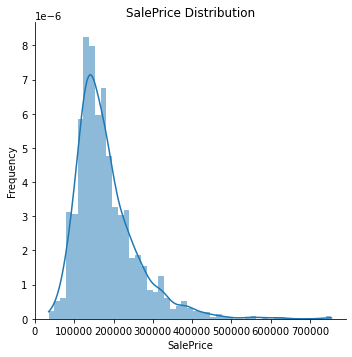

In [23]:
sns.displot(train['SalePrice'], kde=True, stat="density", linewidth=0)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

<div style="border-bottom: 3px solid black"></div>

### Observation

As expected, the data is not normally distributed. In fact, it is heavily skewed to the right. Let's fix that.

Text(0.5, 1.0, 'SalePrice Distribution')

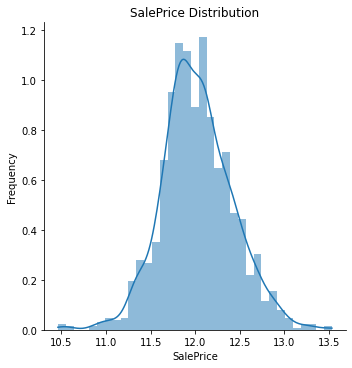

In [24]:
# normalize our label
train['SalePrice'] = np.log1p(train['SalePrice'])

# normalize our features as well
# Credit to Kaggle user @apapiu for the following code which helped us implement proper feature normalization
numeric_feats = train.dtypes[train.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
train[skewed_feats] = np.log1p(train[skewed_feats])
test[skewed_feats] = np.log1p(test[skewed_feats])

# plot our new normalizated data
sns.displot(train['SalePrice'], kde=True, stat="density", linewidth=0)
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

<div style="border-bottom: 3px solid black"></div>

### 1. Observation

Much better! We can now update our train & test variables, as we are ready to use them for our linear regression model training. 

In [25]:
i = train.shape[0]

# one hot encoding of all the data combined to avoid shape mismatch between training set and test set
y_train = train.SalePrice.values
combined = pd.concat((train, test)).reset_index(drop=True)
combined = pd.get_dummies(combined)
combined.drop(['SalePrice'], axis=1, inplace=True)
X_train = combined[:i]
X_test = combined[i:]

print(X_train.shape)
print(X_test.shape)

(1458, 154)
(1459, 154)


<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 1. Training our models

In [21]:
# TODO: 

# 1. SLOWLY LOOK AT MORE FEATURES LIKE GARAGETYPE; MORE DATA PROCESSING CAN BE DONE FOR SURE BUT ITS FINE FOR NOW
# 2. CHOOSE WHAT MODELS TO TRAIN
# 3. TRAIN THEM
# scatter_plot('GarageType', 'SalePrice')

In [27]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
lasso = make_pipeline(StandardScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [43]:
pred = pd.DataFrame()
pred['Id'] = test_id
pred['SalePrice'] = np.expm1(y_pred)
pred.to_csv('submission.csv', index=False)

print(np.expm1(train['SalePrice']).describe())
print(pred['SalePrice'].describe().apply(lambda f: round(f, 3)))

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
count       1459.000
mean      178093.025
std        78581.019
min        35841.173
25%       125666.141
50%       158665.507
75%       210558.081
max      1021003.799
Name: SalePrice, dtype: float64


In [ ]:
# ELASTIC NET MODEL

In [29]:
enet = make_pipeline(robustscaler(), ElasticNet(alpha = 0.0005, random_state = 1))
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test)

In [30]:
pred = pd.DataFrame()
pred['Id'] = test_id
pred['SalePrice'] = np.expm1(y_pred_enet)
pred.to_csv('enetsubmission.csv', index=False)

print(np.expm1(train['SalePrice']).describe())
print(pred['SalePrice'].describe().apply(lambda f: round(f, 3)))

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
count       1459.000
mean      178115.522
std        78936.509
min        35715.757
25%       125562.380
50%       158910.989
75%       210551.683
max      1037692.957
Name: SalePrice, dtype: float64


In [ ]:
# BASIC LINEAR MODEL

In [34]:
LinReg = make_pipeline(robustscaler(), LinearRegression())
LinReg.fit(X_train, y_train)
y_pred_linreg = LinReg.predict(X_test)

In [35]:
pred = pd.DataFrame()
pred['Id'] = test_id
pred['SalePrice'] = np.expm1(y_pred_linreg)
pred.to_csv('linregsubmission.csv', index=False)

print(np.expm1(train['SalePrice']).describe())
print(pred['SalePrice'].describe().apply(lambda f: round(f, 3)))

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
count      1459.000
mean            inf
std             NaN
min          -1.000
25%      125978.706
50%      159276.203
75%      211248.819
max             inf
Name: SalePrice, dtype: float64


C:\Users\samue\AppData\Local\Temp/ipykernel_16400/4052717159.py:3: RuntimeWarning: overflow encountered in expm1
  pred['SalePrice'] = np.expm1(y_pred_linreg)
